In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
%matplotlib inline

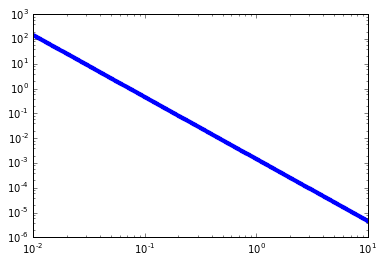

In [3]:
def powerLH(m_min, m_max, M, alpha):
    c = (1.-alpha)/(m_max**(1-alpha)-m_min**(1-alpha))
    P = c*M**(-alpha)
    return P

testM = np.logspace(-2., 1, 1000)
test = powerLH(.01, 10, testM, 2.5)
plt.loglog(testM,test,'.')


NameError: name 'n' is not defined

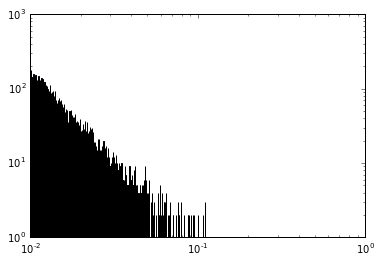

In [4]:
randmasses = np.random.choice(testM, 10000, p = test/np.sum(test))
#n, bins, patches = 
plt.hist(randmasses, bins = 10000)
plt.yscale('log')
plt.xscale('log')
error = np.sqrt(n)+1.

In [5]:
plt.plot(bins[:-1],n/sum(n),'.')
plt.yscale('log')
plt.xscale('log')


NameError: name 'bins' is not defined

In [9]:
import emcee

def powerLH(theta, M):
    if theta[2] < 0:
        return -np.inf
    if theta[0] < 0:
        return -np.inf
    if theta[1] < 0:
        return -np.inf
    c = (1.-theta[2])/(theta[1]**(1-theta[2])-theta[0]**(1-theta[2]))
    P = np.sum(c*M**(-theta[2]))
    return P

ndim, nwalkers = 4, 100
pos = [1+1e-2*np.random.randn(ndim) for i in range(nwalkers)]

sampler = emcee.EnsembleSampler(nwalkers, ndim, powerLH, args = [testM])
sampler.run_mcmc(pos, 2000)


/home/max/anaconda2/envs/moresnakes/lib/python3.5/site-packages/ipykernel/__main__.py:11: RuntimeWarning: overflow encountered in multiply
/home/max/anaconda2/envs/moresnakes/lib/python3.5/site-packages/ipykernel/__main__.py:10: RuntimeWarning: divide by zero encountered in double_scalars
/home/max/anaconda2/envs/moresnakes/lib/python3.5/site-packages/ipykernel/__main__.py:11: RuntimeWarning: overflow encountered in power
/home/max/anaconda2/envs/moresnakes/lib/python3.5/site-packages/emcee/ensemble.py:335: RuntimeWarning: invalid value encountered in subtract
  lnpdiff = (self.dim - 1.) * np.log(zz) + newlnprob - lnprob0
/home/max/anaconda2/envs/moresnakes/lib/python3.5/site-packages/emcee/ensemble.py:336: RuntimeWarning: invalid value encountered in greater
  accept = (lnpdiff > np.log(self._random.rand(len(lnpdiff))))
/home/max/anaconda2/envs/moresnakes/lib/python3.5/site-packages/ipykernel/__main__.py:10: RuntimeWarning: overflow encountered in double_scalars


(array([[  38.63570879,   60.26120437,   86.94371758,   75.29306377],
        [  32.998224  ,   71.59754477,  128.13259598,   92.33452182],
        [  35.8107773 ,   76.02552955,  103.22702801,   89.72480268],
        [  33.01769351,   54.56250352,   92.48072035,   79.70794541],
        [  29.01689466,   64.97788444,   92.40076587,   74.57644333],
        [  41.92802387,   57.93012818,   84.91435851,   78.2054418 ],
        [  49.928581  ,   54.56886527,   87.74575739,   82.40545119],
        [  50.31475316,   74.93086752,  129.61773502,  103.90277012],
        [  34.80091942,   53.98250491,   87.66196687,   74.18065693],
        [  13.97813023,   80.79500877,  124.57510823,   87.70294283],
        [  47.54443478,   75.70986355,  106.8410936 ,  100.03680423],
        [  31.79905655,   78.00718546,   95.94825467,   80.26297262],
        [  31.13372968,   56.92395603,   99.79302302,   80.69277071],
        [  37.99630506,   70.79740648,  118.11847903,   96.51535958],
        [  36.392502

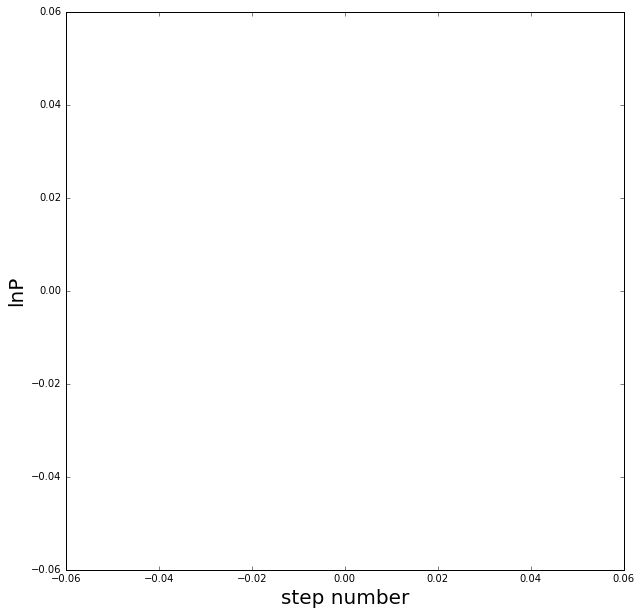

In [8]:
plt.figure(figsize = (10,10))
[plt.plot(sampler.lnprobability[i,100:]) for i in range(100)]
plt.xlabel('step number', fontsize = 20)
plt.ylabel('lnP', fontsize = 20)

In [55]:
pos

[array([ 2.01562984,  2.01377801,  2.00623465]),
 array([ 1.989362  ,  1.99701142,  2.00963893]),
 array([ 1.98789479,  1.99041819,  1.99455704]),
 array([ 2.00087115,  1.9966398 ,  2.00103055]),
 array([ 2.01012086,  1.99313624,  2.00885497]),
 array([ 2.0121481 ,  1.99286051,  2.01702199]),
 array([ 1.98396846,  2.00844309,  1.99675322]),
 array([ 1.99343782,  2.00823684,  2.01093215]),
 array([ 1.98767427,  1.99350089,  1.98527325]),
 array([ 2.00504473,  2.01185055,  1.99342572]),
 array([ 2.00573241,  2.02262228,  2.00558248]),
 array([ 1.99939293,  1.99612155,  1.99578136]),
 array([ 1.99292983,  2.01016808,  2.0111458 ]),
 array([ 1.99659209,  2.00307997,  1.99950116]),
 array([ 2.01024051,  2.0066766 ,  2.00121154]),
 array([ 1.9961321 ,  1.989696  ,  1.99861811]),
 array([ 1.98352144,  1.98845877,  2.01954157]),
 array([ 1.993956  ,  1.99480849,  2.01586373]),
 array([ 1.9945406 ,  1.99852889,  2.00904741]),
 array([ 1.99604778,  2.00028258,  1.99501702]),
 array([ 2.00243281,